In [136]:
import torch
import pandas as pd
import numpy as np
from torch import nn
import os
import sklearn
import matplotlib.pyplot as plt
import sys
import re

### For Colab

In [137]:
# # This mounts your Google Drive to the Colab VM.
# from google.colab import drive
# drive.mount('/content/drive')

# # TODO: Enter the foldername in your Drive where you have saved the unzipped
# # assignment folder, e.g. 'cs231n/assignments/assignment1/'
# FOLDERNAME = 'PyTorch Test Project/N_TXT'
# assert FOLDERNAME is not None, "[!] Enter the foldername."

# # Now that we've mounted your Drive, this ensures that
# # the Python interpreter of the Colab VM can load
# # python files from within it.
# import sys
# sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

# # This downloads the CIFAR-10 dataset to your Drive
# # if it doesn't already exist.
# # %cd /content/drive/My\ Drive/$FOLDERNAME/cs231n/datasets/
# # !bash get_datasets.sh
# # %cd /content/drive/My\ Drive/$FOLDERNAME

In [138]:
# path = "/content/drive/MyDrive/PyTorch Test Project/N_TXT"

# os.chdir(path)

# fx_data = np.array([], dtype=np.float32)

# #gets data from file specified by file_path
# def get_contents(file_path):
#     global fx_data
#     skip_lines = 7

#     with open(file_path,'r') as file:

#         for skips in range(skip_lines):
#             next(file)

#         lines = file.readlines()[:-1]

#         for line in lines:
#             data = line.split()[-1]
#             fx_data = np.append(fx_data, np.float32(data))
#             #print(data)

In [139]:
path = "/Users/jm/VS Code/ML/Time Series Prediction/N_TXT"

os.chdir(path)

fx_data = np.array([], dtype=np.float32)

#gets data from file specified by file_path
def get_contents(file_path):
    global fx_data
    skip_lines = 7

    with open(file_path,'r') as file:

        for skips in range(skip_lines):
            next(file)

        lines = file.readlines()[:-1]

        for line in lines:
            data = line.split()[-1]
            fx_data = np.append(fx_data, np.float32(data))
            #print(data)

In [140]:
#go through all files in directory and extract data from txt files
for file in os.listdir():
    if file.endswith(".txt"):
        file_path = f"{path}/{file}"

        print(f"Currently working on: {file_path}")
        get_contents(file_path)

fx_data.dtype

Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/9Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/8Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/1Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/3Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/10Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/2Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/11Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/7Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/6Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/4Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/5Npie.txt


dtype('float32')

In [141]:
#create time "sample" for dataframe
time_data = np.array([], dtype=np.float32)

for x in range(len(fx_data)):
    time_data = np.append(time_data, np.float32(x))
    type(x)

time_data, time_data[0].dtype

(array([0.00000e+00, 1.00000e+00, 2.00000e+00, ..., 1.87857e+05,
        1.87858e+05, 1.87859e+05], dtype=float32),
 dtype('float32'))

In [142]:
#create time "sample" for dataframe
dataset = pd.DataFrame({"Time": time_data,
                        "FX Channel": fx_data})
dataset

,Time,FX Channel
0,0.0,-0.6
1,1.0,-0.6
2,2.0,-0.6
3,3.0,-0.6
4,4.0,-0.6
...,...,...
187855,187855.0,4.1
187856,187856.0,4.1
187857,187857.0,4.1
187858,187858.0,4.1


([<matplotlib.lines.Line2D at 0x33ff9d8d0>], pandas.core.frame.DataFrame)

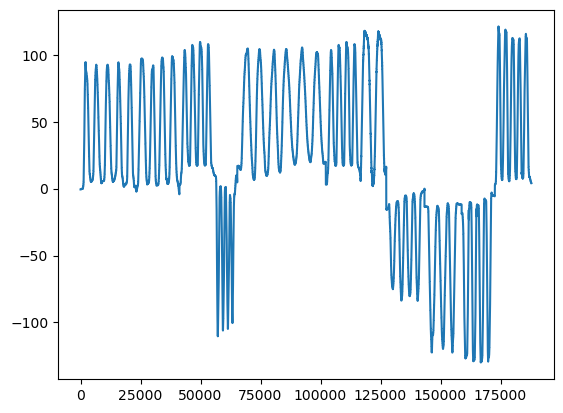

In [143]:
plt.plot(dataset["Time"], dataset["FX Channel"]), type(dataset)

In [144]:
from copy import deepcopy as dc

def lstm_dataframe(df, n_steps):
    df = dc(df)
    
    # df.set_index("FX Channel")

    for i in range(1, n_steps+1):
        df[f'Time(t-{i})'] = df['Time'].shift(i)
        
    df.dropna(inplace=True)
    
    return df

n_steps = 7
shifted_df = lstm_dataframe(dataset, n_steps)

shifted_df, shifted_df.shape

(            Time  FX Channel  Time(t-1)  Time(t-2)  Time(t-3)  Time(t-4)  \
 7            7.0        -0.6        6.0        5.0        4.0        3.0   
 8            8.0        -0.6        7.0        6.0        5.0        4.0   
 9            9.0        -0.6        8.0        7.0        6.0        5.0   
 10          10.0        -0.6        9.0        8.0        7.0        6.0   
 11          11.0        -0.6       10.0        9.0        8.0        7.0   
 ...          ...         ...        ...        ...        ...        ...   
 187855  187855.0         4.1   187854.0   187853.0   187852.0   187851.0   
 187856  187856.0         4.1   187855.0   187854.0   187853.0   187852.0   
 187857  187857.0         4.1   187856.0   187855.0   187854.0   187853.0   
 187858  187858.0         4.1   187857.0   187856.0   187855.0   187854.0   
 187859  187859.0         4.1   187858.0   187857.0   187856.0   187855.0   
 
         Time(t-5)  Time(t-6)  Time(t-7)  
 7             2.0        1.0  

In [145]:
columnsTitles = ['FX Channel', 'Time']

for i in range(n_steps+1):
    columnsTitles.append(f"Time(t-{i})")

shifted_df = shifted_df.reindex(columns=columnsTitles)
shifted_df = shifted_df.drop(columns=["Time(t-0)"])

shifted_df, type(columnsTitles), len(columnsTitles), shifted_df.shape

(        FX Channel      Time  Time(t-1)  Time(t-2)  Time(t-3)  Time(t-4)  \
 7             -0.6       7.0        6.0        5.0        4.0        3.0   
 8             -0.6       8.0        7.0        6.0        5.0        4.0   
 9             -0.6       9.0        8.0        7.0        6.0        5.0   
 10            -0.6      10.0        9.0        8.0        7.0        6.0   
 11            -0.6      11.0       10.0        9.0        8.0        7.0   
 ...            ...       ...        ...        ...        ...        ...   
 187855         4.1  187855.0   187854.0   187853.0   187852.0   187851.0   
 187856         4.1  187856.0   187855.0   187854.0   187853.0   187852.0   
 187857         4.1  187857.0   187856.0   187855.0   187854.0   187853.0   
 187858         4.1  187858.0   187857.0   187856.0   187855.0   187854.0   
 187859         4.1  187859.0   187858.0   187857.0   187856.0   187855.0   
 
         Time(t-5)  Time(t-6)  Time(t-7)  
 7             2.0        1.0  

In [146]:
dataset = shifted_df.to_numpy()

dataset.shape, dataset

((187853, 9),
 array([[-6.00000e-01,  7.00000e+00,  6.00000e+00, ...,  2.00000e+00,
          1.00000e+00,  0.00000e+00],
        [-6.00000e-01,  8.00000e+00,  7.00000e+00, ...,  3.00000e+00,
          2.00000e+00,  1.00000e+00],
        [-6.00000e-01,  9.00000e+00,  8.00000e+00, ...,  4.00000e+00,
          3.00000e+00,  2.00000e+00],
        ...,
        [ 4.10000e+00,  1.87857e+05,  1.87856e+05, ...,  1.87852e+05,
          1.87851e+05,  1.87850e+05],
        [ 4.10000e+00,  1.87858e+05,  1.87857e+05, ...,  1.87853e+05,
          1.87852e+05,  1.87851e+05],
        [ 4.10000e+00,  1.87859e+05,  1.87858e+05, ...,  1.87854e+05,
          1.87853e+05,  1.87852e+05]], dtype=float32))

In [147]:
X = dataset[:, 1:]
y = dataset[:, 0]

X.shape, y.shape, y[0], X[0]

((187853, 8),
 (187853,),
 -0.6,
 array([7., 6., 5., 4., 3., 2., 1., 0.], dtype=float32))

In [148]:
X = dc(np.flip(X, axis=1))
X

array([[0.00000e+00, 1.00000e+00, 2.00000e+00, ..., 5.00000e+00,
        6.00000e+00, 7.00000e+00],
       [1.00000e+00, 2.00000e+00, 3.00000e+00, ..., 6.00000e+00,
        7.00000e+00, 8.00000e+00],
       [2.00000e+00, 3.00000e+00, 4.00000e+00, ..., 7.00000e+00,
        8.00000e+00, 9.00000e+00],
       ...,
       [1.87850e+05, 1.87851e+05, 1.87852e+05, ..., 1.87855e+05,
        1.87856e+05, 1.87857e+05],
       [1.87851e+05, 1.87852e+05, 1.87853e+05, ..., 1.87856e+05,
        1.87857e+05, 1.87858e+05],
       [1.87852e+05, 1.87853e+05, 1.87854e+05, ..., 1.87857e+05,
        1.87858e+05, 1.87859e+05]], dtype=float32)

In [149]:
#trying to split data loader now? not too sure if this is the best way
split_idx = int(0.8 * len(dataset))

X_train = X[:split_idx]
X_test = X[split_idx:]

y_train = y[:split_idx]
y_test = y[split_idx:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150282, 8), (37571, 8), (150282,), (37571,))

In [150]:
# X_train = torch.from_numpy(X_train.to_numpy()).type(torch.float32)
# y_train = torch.from_numpy(y_train.to_numpy()).type(torch.float32)
# X_test = torch.from_numpy(X_test.to_numpy()).type(torch.float32)
# y_test = torch.from_numpy(y_test.to_numpy()).type(torch.float32)

# X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [151]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

X_train = scaler.fit_transform(X_train.reshape(-1, 1))
X_test = scaler.fit_transform(X_test.reshape(-1, 1))

y_train = scaler.fit_transform(y_train.reshape(-1,1))
y_test = scaler.fit_transform(y_test.reshape(-1,1))

In [152]:
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([1202256, 1]),
 torch.Size([300568, 1]),
 torch.Size([150282, 1]),
 torch.Size([37571, 1]))

In [153]:
X_train[0].dtype, type(X_train)

(torch.float32, torch.Tensor)

In [154]:
#set device
device = "cuda" if torch.cuda.is_available() else "cpu"
device = "mps" if torch.backends.mps.is_available() else "cpu"

device

'mps'

In [155]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([1202256, 1]),
 torch.Size([300568, 1]),
 torch.Size([150282, 1]),
 torch.Size([37571, 1]))

In [156]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]
    
train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [157]:
from torch.utils.data import DataLoader

#setup batch size hyperparameter
BATCH_SIZE = 64

#turn datasets into iterables (batches)
train_loader = DataLoader(dataset=train_dataset, 
                              batch_size=BATCH_SIZE, 
                              shuffle=True, 
                              drop_last=True)

test_loader = DataLoader(dataset=test_dataset, 
                              batch_size=BATCH_SIZE, 
                              shuffle=False,
                              drop_last=True)

#check out what we've created
print(f"Dataloaders: {train_loader, test_loader}")
print(f"Length of train_dataloader: {len(train_loader)} batches of {BATCH_SIZE}")
print(f"Length of train_dataloader: {len(test_loader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x3430cd5d0>, <torch.utils.data.dataloader.DataLoader object at 0x3430cf100>)
Length of train_dataloader: 18785 batches of 64
Length of train_dataloader: 4696 batches of 64


In [158]:
#set manual seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)
device

'mps'

In [159]:
class CNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            #create a conv later
            nn.Conv1d(in_channels=input_size, 
                      out_channels=hidden_size,
                      kernel_size=1,
                      stride=1,
                      padding=1), #values we can set outselves in our NN are called hyperparameters
            nn.ReLU(),
            nn.Conv1d(in_channels=hidden_size,
                      out_channels = hidden_size,
                      kernel_size=1,
                      stride=1,
                      padding=1
            ),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=1)
        )
        self.regressor = nn.Sequential(
            nn.Linear(in_features=5, 
                      out_features=output_size)
        )

    def forward(self, x):
        x = self.conv_block_1(x)

        x  = self.regressor(x)
        return x

model = CNN(1, 1, 1)
model.to(device)
model

CNN(
  (conv_block_1): Sequential(
    (0): Conv1d(1, 1, kernel_size=(1,), stride=(1,), padding=(1,))
    (1): ReLU()
    (2): Conv1d(1, 1, kernel_size=(1,), stride=(1,), padding=(1,))
    (3): ReLU()
    (4): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (regressor): Sequential(
    (0): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [160]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0
    train_loss = 0.0
    
    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        # print(f"X batch shape = {x_batch.shape}")
        # print(f"y batch shape = {y_batch.shape}")
        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()
        train_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0

    global train_acc
    train_acc = np.append(train_acc, train_loss/len(train_loader))
    print()

In [161]:
def validate_one_epoch():
    model.eval()
    running_loss = 0.0
    test_loss = 0.0
    
    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        # print(f"X batch shape = {x_batch.shape}")
        # print(f"y batch shape = {y_batch.shape}")
        with torch.inference_mode():
            output = model(x_batch)
            # print(f"{y_batch.shape}")
            loss = loss_function(output, y_batch)
            running_loss += loss.item()
            test_loss += loss.item()
                

    avg_loss_across_batches = running_loss / len(test_loader)
    
    global test_acc
    test_acc = np.append(test_acc, avg_loss_across_batches)

    test_loss = 0.0
    
    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [162]:
learning_rate = 0.01
num_epochs = 25
loss_function = nn.MSELoss()
# optimizer = torch.optim.Adam(model.parameters(), 
#                              lr=learning_rate, 
#                              weight_decay=1e-5)

optimizer = torch.optim.Adam(model.parameters(), 
                             lr=learning_rate
                            )
train_acc = np.array([])
test_acc = np.array([])

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1


IndexError: index 865106 is out of bounds for dimension 0 with size 150282

In [ ]:
X_train.shape, len(X_train)

(torch.Size([150288, 1]), 150288)

In [ ]:
print(model)

CNN(
  (conv_block_1): Sequential(
    (0): Conv1d(64, 1, kernel_size=(1,), stride=(1,), padding=(1,))
    (1): ReLU()
    (2): Conv1d(1, 1, kernel_size=(1,), stride=(1,), padding=(1,))
    (3): ReLU()
    (4): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (regressor): Sequential(
    (0): Linear(in_features=5, out_features=1, bias=True)
  )
)


In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: torch.utils.data.DataLoader,
                     device: torch.device = device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        print(f"loader size: {len(data)}")
        for batch_index, batch in enumerate(data):
            
            x_batch, y_batch = batch[0].to(device), batch[1].to(device)
            
            pred = model(x_batch)
            #print(pred)
            pred_probs.append(pred.cpu().squeeze(dim=1))

    #stack turns list into a tensor
    return pred_probs

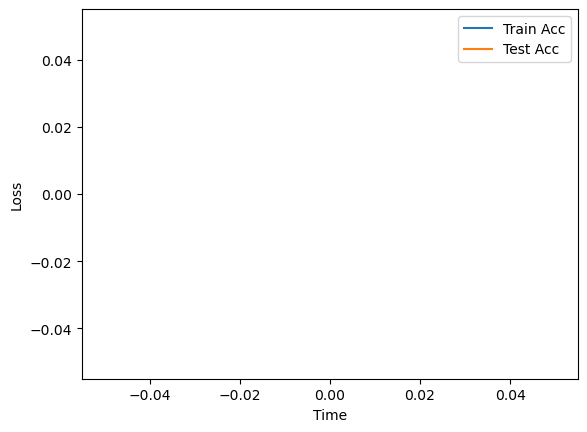

In [ ]:
plt.plot(train_acc, label='Train Acc')
plt.plot(test_acc, label='Test Acc')
plt.xlabel('Time')
plt.ylabel('Loss')
plt.legend()
plt.show()

loader size: 150288


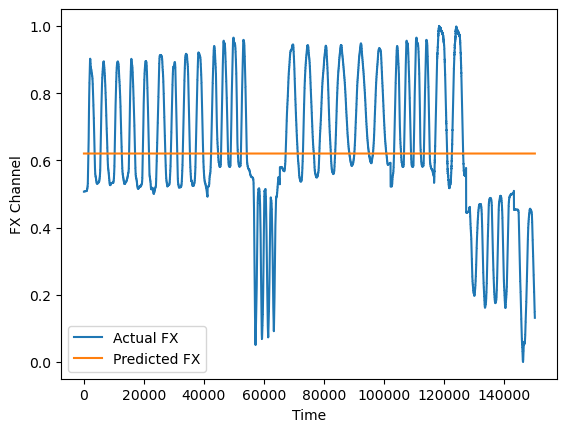

In [ ]:
model.eval()


predicted = make_predictions(model, 
                             train_loader, 
                             device)

plt.plot(y_train, label='Actual FX')
plt.plot(predicted, label='Predicted FX')
plt.xlabel('Time')
plt.ylabel('FX Channel')
plt.legend()
plt.show()


In [ ]:
type(predicted)

list

In [ ]:
model.eval()
with torch.inference_mode():
    test_pred = model(X_test.to(device)).to('cpu').numpy()

plt.plot(y_test, label='Actual FX')
plt.plot(test_pred, label='Test Predicted FX')
plt.xlabel('Time')
plt.ylabel('FX Channel')
plt.legend()
plt.show()

RuntimeError: Given groups=1, weight of size [1, 1, 1], expected input[1, 37572, 1] to have 1 channels, but got 37572 channels instead

In [ ]:
X_test.shape, X_test[0]

(torch.Size([37572, 1]), tensor([0.]))

In [ ]:
temp = torch.arange(0, 1, 0.000016)
temp = temp.unsqueeze(dim=1)
temp.shape

torch.Size([62500, 1])

In [ ]:
model.eval()
with torch.inference_mode():
    test_pred = model(temp.unsqueeze(dim=1)).to('cpu').numpy()

# plt.xlim(0, (10000))
# plt.ylim(-0, 1)
# plt.autoscale(False)
plt.plot(y_test, label='Actual FX')
plt.plot(test_pred, label='Test Predicted FX')
plt.xlabel('Time')
plt.ylabel('FX Channel')
plt.legend()
plt.show()

RuntimeError: Input and hidden tensors are not at the same device, found input tensor at cpu and hidden tensor at mps:0

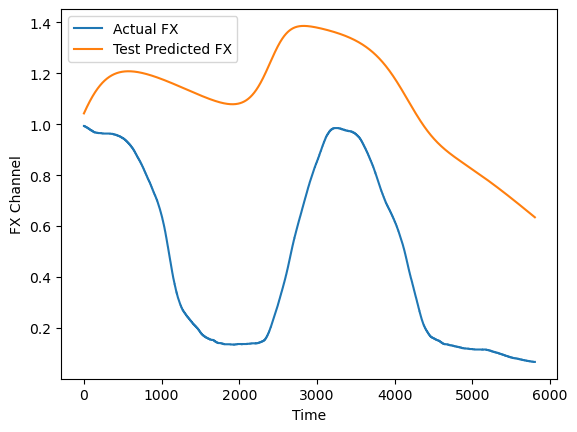

In [ ]:
model.eval()
with torch.inference_mode():
    test_pred = model(X_test).to('cpu').numpy()

plt.plot(y_test, label='Actual FX')
plt.plot(test_pred, label='Test Predicted FX')
plt.xlabel('Time')
plt.ylabel('FX Channel')
plt.legend()
plt.show()

In [ ]:
y_test[0], y_test[5800], y_train[0], y_train[23000]

(tensor([0.9934]), tensor([0.0665]), tensor([0.]), tensor([0.9775]))

In [ ]:
X_test.max(), X_test.min()

(tensor(1.0000), tensor(0.8000))